# Maternal Health Risk Dataset Test

This notebook tests the download and loading of the Maternal Health Risk dataset from Kaggle.

In [1]:
# Install required packages
!pip install kagglehub pandas matplotlib seaborn

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download the dataset to current directory
print("Downloading Maternal Health Risk dataset...")
cache_path = kagglehub.dataset_download("csafrit2/maternal-health-risk-data")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.77k/3.77k [00:00<00:00, 1.28MB/s]

Extracting files...
Copied Maternal Health Risk Data Set.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/maternal_health_risk


In [3]:
# Load and explore the data
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nFirst 5 rows:\n{df.head()}")
    
    # Check risk level distribution
    risk_col = [col for col in df.columns if 'risk' in col.lower()]
    if risk_col:
        risk_column = risk_col[0]
        print(f"\nRisk level distribution:")
        print(df[risk_column].value_counts())
    
    # Basic statistics
    print(f"\nBasic statistics:\n{df.describe()}")

Dataset shape: (1014, 7)

Columns: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']

First 5 rows:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

Risk level distribution:
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

Basic statistics:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000   

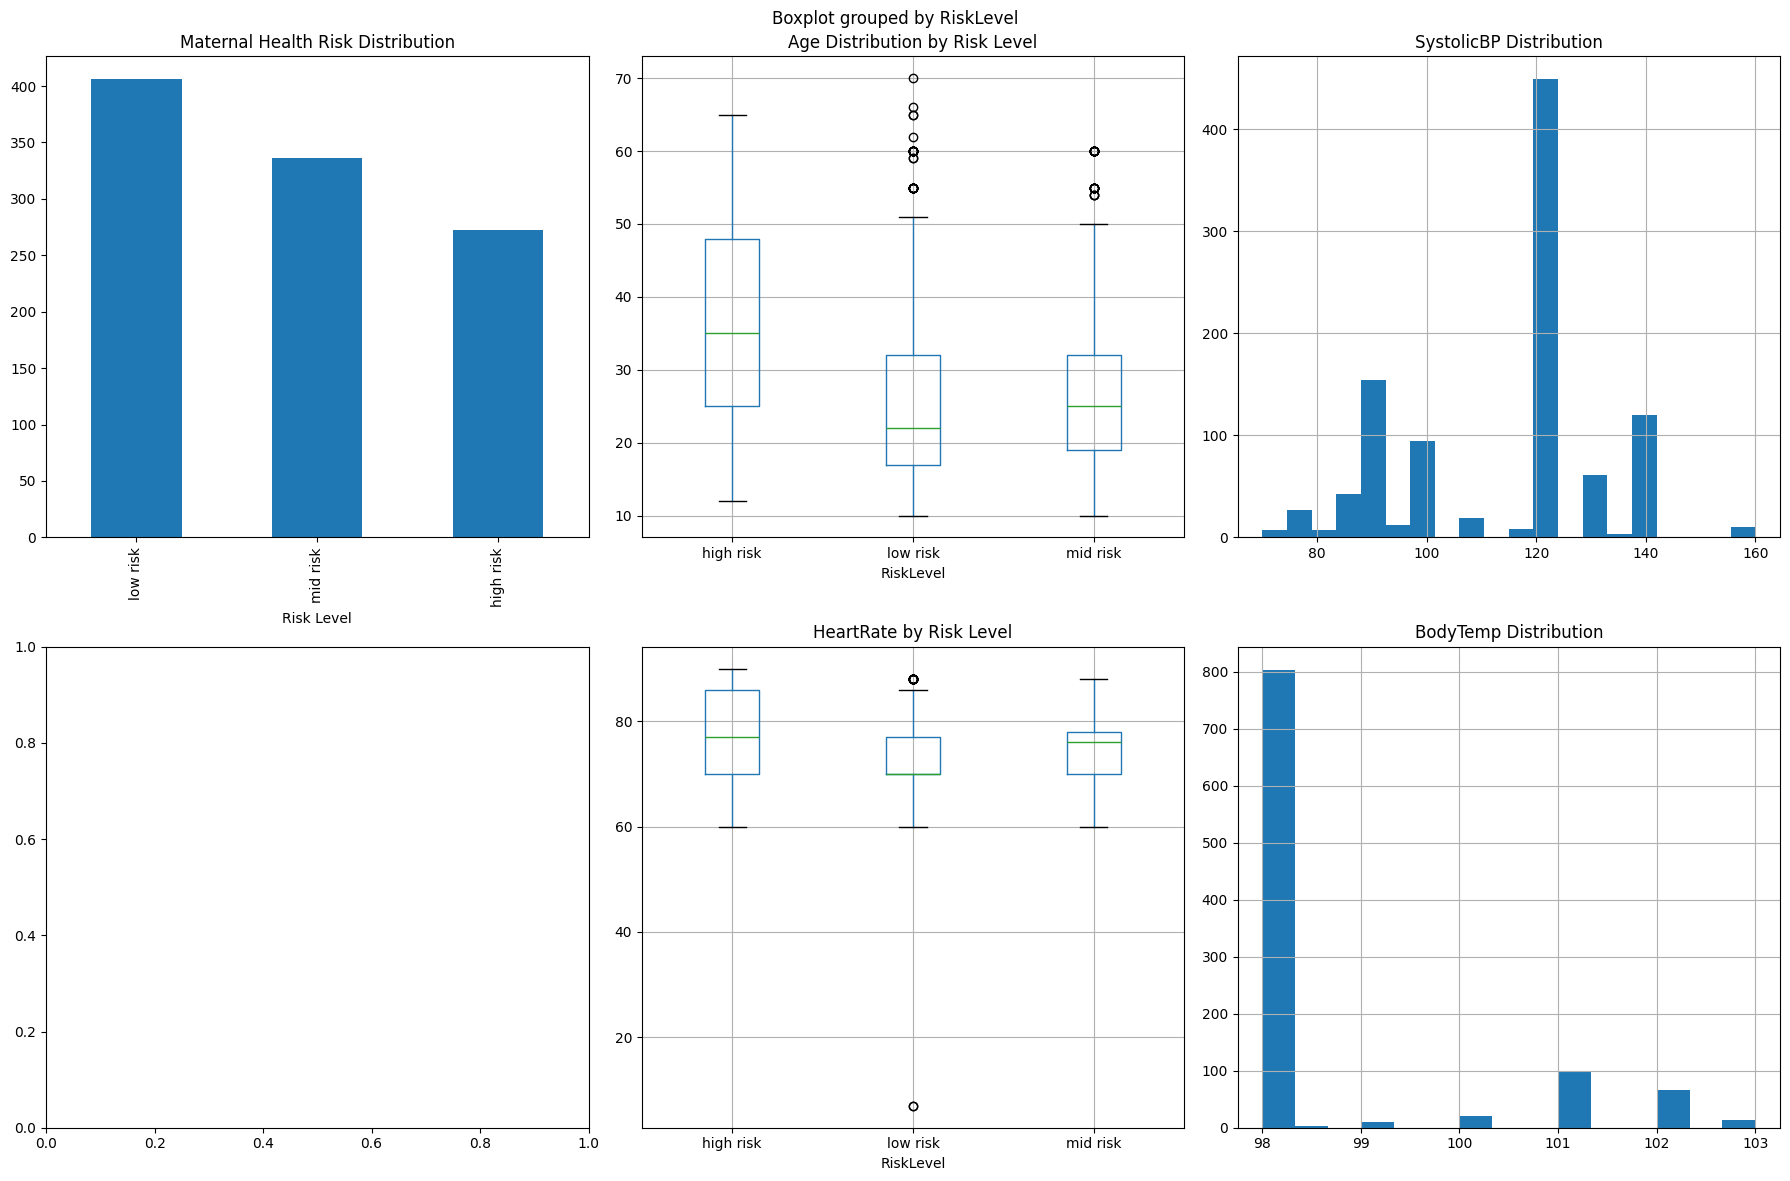

In [4]:
# Create maternal health visualizations
if csv_files and len(df) > 0:
    # Find risk level column
    risk_col = [col for col in df.columns if 'risk' in col.lower()]
    risk_column = risk_col[0] if risk_col else df.columns[-1]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    # Risk level distribution
    df[risk_column].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title('Maternal Health Risk Distribution')
    axes[0].set_xlabel('Risk Level')
    
    # Age distribution by risk level
    if 'Age' in df.columns:
        df.boxplot(column='Age', by=risk_column, ax=axes[1])
        axes[1].set_title('Age Distribution by Risk Level')
    
    # Blood pressure analysis
    bp_cols = [col for col in df.columns if 'pressure' in col.lower() or 'bp' in col.lower()]
    if bp_cols:
        bp_col = bp_cols[0]
        df[bp_col].hist(bins=20, ax=axes[2])
        axes[2].set_title(f'{bp_col} Distribution')
    
    # Blood sugar levels
    bs_cols = [col for col in df.columns if 'sugar' in col.lower() or 'glucose' in col.lower()]
    if bs_cols:
        bs_col = bs_cols[0]
        df[bs_col].hist(bins=20, ax=axes[3])
        axes[3].set_title(f'{bs_col} Distribution')
    
    # Heart rate analysis
    hr_cols = [col for col in df.columns if 'heart' in col.lower() or 'hr' in col.lower()]
    if hr_cols:
        hr_col = hr_cols[0]
        df.boxplot(column=hr_col, by=risk_column, ax=axes[4])
        axes[4].set_title(f'{hr_col} by Risk Level')
    
    # Body temperature
    temp_cols = [col for col in df.columns if 'temp' in col.lower()]
    if temp_cols:
        temp_col = temp_cols[0]
        df[temp_col].hist(bins=15, ax=axes[5])
        axes[5].set_title(f'{temp_col} Distribution')
    
    plt.tight_layout()
    plt.show()


Maternal Health Risk Analysis:
- Total patients: 1,014

Risk level distribution:
- low risk: 40.0%
- mid risk: 33.1%
- high risk: 26.8%

Average values by risk level:
             Age  SystolicBP  DiastolicBP     BS  BodyTemp  HeartRate
RiskLevel                                                            
high risk  36.22      124.19        85.07  12.12     98.90      76.74
low risk   26.87      105.87        72.53   7.22     98.37      72.77
mid risk   28.36      113.15        74.23   7.80     98.83      74.18


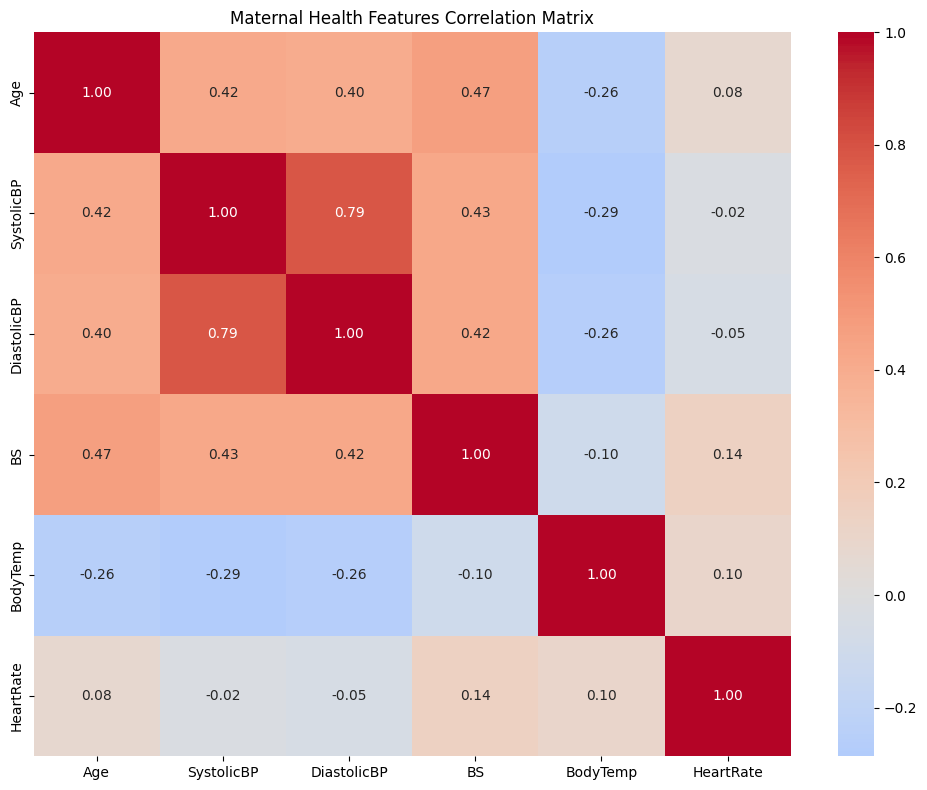

In [5]:
# Maternal health risk factor analysis
if csv_files and len(df) > 0:
    risk_col = [col for col in df.columns if 'risk' in col.lower()]
    risk_column = risk_col[0] if risk_col else df.columns[-1]
    
    print("\nMaternal Health Risk Analysis:")
    print(f"- Total patients: {len(df):,}")
    
    # Risk distribution
    risk_dist = df[risk_column].value_counts(normalize=True) * 100
    print(f"\nRisk level distribution:")
    for level, percentage in risk_dist.items():
        print(f"- {level}: {percentage:.1f}%")
    
    # Feature analysis by risk level
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_features = [col for col in numeric_features if col != risk_column]
    
    if len(numeric_features) > 0:
        print(f"\nAverage values by risk level:")
        risk_analysis = df.groupby(risk_column)[numeric_features].mean()
        print(risk_analysis.round(2))
    
    # Correlation analysis
    if len(numeric_features) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_features].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Maternal Health Features Correlation Matrix')
        plt.tight_layout()
        plt.show()

In [6]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
if csv_files:
    print(f"- Patients: {df.shape[0]:,}")
    print(f"- Health indicators: {df.shape[1]}")
    if risk_col:
        risk_levels = df[risk_col[0]].nunique()
        print(f"- Risk levels: {risk_levels}")
print("- Use case: Maternal health risk prediction, pregnancy monitoring, healthcare decision support")
print("- Perfect for: Module 5 (Machine Learning), Module 7 (Public Health Modeling), women's health analytics")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/maternal_health_risk
- Patients: 1,014
- Health indicators: 7
- Risk levels: 3
- Use case: Maternal health risk prediction, pregnancy monitoring, healthcare decision support
- Perfect for: Module 5 (Machine Learning), Module 7 (Public Health Modeling), women's health analytics
